# Housing Prices Competition for Kaggle Learn Users

<br>

## Apply what you learned in the Machine Learning course on Kaggle Learn alongside others in the course.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1 - Importando os dados

In [2]:
df_train = pd.read_csv("./Data/train.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2 - Lendo e Tratando os dados

In [4]:
df_numeric = df_train.select_dtypes(include=[np.number]) 
numericas = list(df_numeric)

In [5]:
df_train[numericas] = df_train[numericas].fillna(df_train.mean())#Tratando os nulos

In [6]:
df_train = df_train.fillna('Uninformed') # substitui os dados faltantes por 'Uninformed'
df_train = df_train.dropna() 


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [8]:
import statsmodels.formula.api as smf

In [9]:
function1 = '''SalePrice ~
+ MSSubClass
+ LotFrontage
+ LotArea          
+ OverallQual
+ OverallCond      
+ YearBuilt        
+ YearRemodAdd     
+ MasVnrArea       
+ BsmtFinSF1       
+ BsmtFinSF2       
+ BsmtUnfSF        
+ TotalBsmtSF
    
      
+ LowQualFinSF     
+ GrLivArea        
+ BsmtFullBath     
+ BsmtHalfBath     
+ FullBath         
+ HalfBath         
+ BedroomAbvGr     
+ KitchenAbvGr     
+ TotRmsAbvGrd     
+ Fireplaces       
+ GarageYrBlt
+ GarageCars
+ GarageArea       
+ WoodDeckSF
+ OpenPorchSF      
+ EnclosedPorch
+ ScreenPorch      
+ PoolArea         
+ MiscVal          
+ MoSold           
+ YrSold
'''

model1 = smf.ols(function1, df_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     194.0
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        18:06:46   Log-Likelihood:                -17320.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1427   BIC:                         3.488e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.457e+05   1.41e+06      0.316

In [10]:
from scipy import stats

skewed_feats = df_train[numericas].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nAssimetria: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Assimetria: 



,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


(array([ 37.,  96., 132., 417., 403., 197.,  79.,  38.,  10.,  15.,   7.,
          4.,   2.,   2.,   2.,   4.,   0.,   2.,   0.,   1.,   1.,   1.,
          0.,   3.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([     0.,   2300.,   4600.,   6900.,   9200.,  11500.,  13800.,
         16100.,  18400.,  20700.,  23000.,  25300.,  27600.,  29900.,
         32200.,  34500.,  36800.,  39100.,  41400.,  43700.,  46000.,
         48300.,  50600.,  52900.,  55200.,  57500.,  59800.,  62100.,
         64400.,  66700.,  69000.,

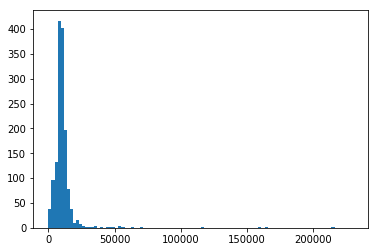

In [11]:
plt.hist(df_train.LotArea,bins=100, range=(0,230000))

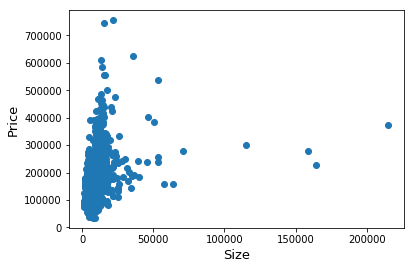

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['LotArea'], y = df_train['SalePrice'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Size', fontsize=13)
plt.show()

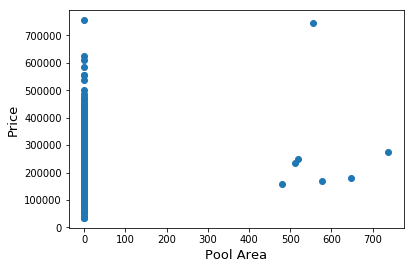

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['PoolArea'], y = df_train['SalePrice'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Pool Area', fontsize=13)
plt.show()

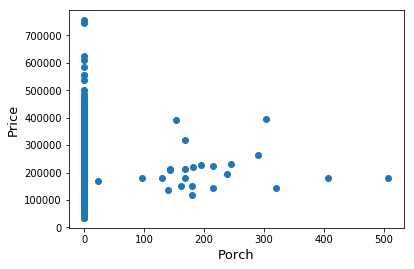

In [14]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['3SsnPorch'], y = df_train['SalePrice'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Porch', fontsize=13)
plt.show()

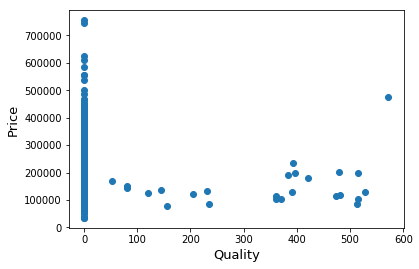

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['LowQualFinSF'], y = df_train['SalePrice'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Quality', fontsize=13)
plt.show()

In [16]:
df_train['log_LotArea'] = np.log1p(df_train['LotArea'])
df_train['log_3SsnPorch'] = np.log1p(df_train['3SsnPorch'])
df_train['log_LowQualFinSF'] = np.log1p(df_train['LowQualFinSF'])
df_train['log_PoolArea'] = np.log1p(df_train['PoolArea'])

df_train['log_BsmtFinSF2'] = np.log1p(df_train['BsmtFinSF2'])
df_train['log_BsmtUnfSF'] = np.log1p(df_train['BsmtUnfSF'])
df_train['log_BsmtHalfBath'] = np.log1p(df_train['BsmtHalfBath'])
df_train['log_GarageArea'] = np.log1p(df_train['GarageArea'])
df_train['log_OpenPorchSF'] = np.log1p(df_train['OpenPorchSF'])
df_train['log_MiscVal'] = np.log1p(df_train['MiscVal'])
df_train['log_MoSold'] = np.log1p(df_train['MoSold'])

df_train['log_KitchenAbvGr'] = np.log1p(df_train['KitchenAbvGr'])
df_train['log_BsmtFinSF2'] = np.log1p(df_train['BsmtFinSF2'])
df_train['log_ScreenPorch'] = np.log1p(df_train['ScreenPorch'])
df_train['log_BsmtHalfBath'] = np.log1p(df_train['BsmtHalfBath'])
df_train['log_EnclosedPorch'] = np.log1p(df_train['EnclosedPorch'])



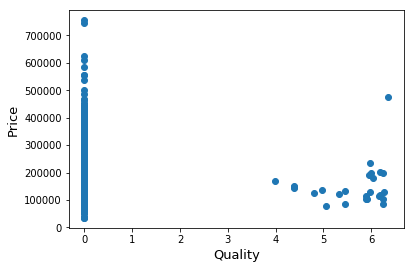

In [17]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['log_LowQualFinSF'], y = df_train['SalePrice'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Quality', fontsize=13)
plt.show()

### 3 - Dummies

In [18]:
categorics_feats = df_train.dtypes[df_train.dtypes == "object"].index

In [19]:
categorics_feats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
df_train['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [21]:
df_dummies = ['LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'ExterQual','HouseStyle']

In [22]:
df_train = pd.get_dummies(df_train, columns=['LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'ExterQual','HouseStyle'])

In [23]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,...,ExterQual_Gd,ExterQual_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,1,60,RL,65.000000,8450,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,0,0,0,0,1,0,0
1,2,20,RL,80.000000,9600,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,1,0,0,1,0,0,0,0,0
2,3,60,RL,68.000000,11250,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,0,0,0,0,1,0,0
3,4,70,RL,60.000000,9550,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,1,0,0,0,0,0,1,0,0
4,5,60,RL,84.000000,14260,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,0,0,0,0,1,0,0
5,6,50,RL,85.000000,14115,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,1,1,0,0,0,0,0,0,0
6,7,20,RL,75.000000,10084,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,0,1,0,0,0,0,0
7,8,60,RL,70.049958,10382,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,1,0,0,0,0,0,1,0,0
8,9,50,RM,51.000000,6120,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,1,1,0,0,0,0,0,0,0
9,10,190,RL,50.000000,7420,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,1,0,1,0,0,0,0,0,0


### 4 - Treinando os modelos

### 4.1 - Importando e instanciando os modelos

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
modelo_MQO = LinearRegression()
modelo_RF = RandomForestRegressor()
modelo_gradient = GradientBoostingRegressor(max_depth=3)

### 5 - Separando os dados em variáveis explicativas X e explicadas/target Y__

In [26]:
df_numeric = df_train.select_dtypes(include=[np.number]) 
numericas = list(df_numeric)

In [27]:
X = df_train[numericas].drop(['SalePrice'], axis = 1)
y = df_train['SalePrice']

### 6 - Separando os dados em treino e teste

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [30]:
X_train.shape

(1095, 106)

### 7 - Treinando o modelo

__Modelo Linear Regression__

In [31]:
modelo_MQO.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

__Modelo Gradiente__

In [32]:
modelo_gradient.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

__Modelo Randon Forest__

In [33]:
modelo_RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### 8 - Analisando as métricas

In [34]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.model_selection import cross_val_score

In [35]:
print("Score Treino - MQO",modelo_MQO.score(X_train, y_train))
print("Score Teste - MQO",modelo_MQO.score(X_test, y_test))
print("Score Treino - Gradient",modelo_gradient.score(X_train, y_train))
print("Score Teste - Gradient",modelo_gradient.score(X_test, y_test))
print("Score Treino - Randon Forest",modelo_RF.score(X_train, y_train))
print("Score Teste - Randon Forest",modelo_RF.score(X_test, y_test))

Score Treino - MQO 0.8666111525386293
Score Teste - MQO 0.8703911755614125
Score Treino - Gradient 0.9665488899718343
Score Teste - Gradient 0.8927097566325547
Score Treino - Randon Forest 0.9697110239084313
Score Teste - Randon Forest 0.883310709169976


In [36]:
# primeiro modelo - regressão linear
yhat_train = modelo_MQO.predict(X_train) # previsao dos dados de treino para calcular as métricas
yhat_test = modelo_MQO.predict(X_test) # previsao dos dados de teste para calcular métricas

print('TREINO - MSE:', mean_squared_error(y_train, yhat_train), 'MAE:', median_absolute_error(y_train, yhat_train),'R2:', r2_score(y_train, yhat_train))
print('TESTE - MSE:', mean_squared_error(y_test, yhat_test), 'MAE:', median_absolute_error(y_test, yhat_test), 'R2:', r2_score(y_train, yhat_train))

TREINO - MSE: 883102833.1506315 MAE: 11674.202819504542 R2: 0.8666111525386293
TESTE - MSE: 689581418.0165874 MAE: 13590.206597815966 R2: 0.8666111525386293


In [37]:
# segundo modelo -  gradient
yhat_train = modelo_gradient.predict(X_train) # previsao dos dados de treino para calcular as métricas
yhat_test = modelo_gradient.predict(X_test) # previsao dos dados de teste para calcular métricas

print('TREINO - MSE:', mean_squared_error(y_train, yhat_train), 'MAE:', median_absolute_error(y_train, yhat_train), 'R2:', r2_score(y_train, yhat_train))
print('TESTE - MSE - test', mean_squared_error(y_test, yhat_test), 'MAE - test', median_absolute_error(y_test, yhat_test),'R2 - test',r2_score(y_test, yhat_test))

TREINO - MSE: 221463567.60794047 MAE: 7997.067073054379 R2: 0.9665488899718344
TESTE - MSE - test 570835809.0673383 MAE - test 11266.250352131872 R2 - test 0.8927097566325547


In [38]:
# terceiro modelo -  random forest
yhat_train = modelo_RF.predict(X_train) # previsao dos dados de treino para calcular as métricas
yhat_test = modelo_RF.predict(X_test) # previsao dos dados de teste para calcular métricas

print('TREINO - MSE:', mean_squared_error(y_train, yhat_train), 'MAE:', median_absolute_error(y_train, yhat_train), 'R2:', r2_score(y_train, yhat_train))
print('TESTE - MSE - test', mean_squared_error(y_test, yhat_test), 'MAE - test', median_absolute_error(y_test, yhat_test),'R2 - test',r2_score(y_test, yhat_test))


TREINO - MSE: 200528613.21440184 MAE: 4887.899999999994 R2: 0.9697110239084313
TESTE - MSE - test 620843271.9490137 MAE - test 13870.0 R2 - test 0.883310709169976


In [39]:
cross_val_score(modelo_MQO, X, y, cv=10, )

array([0.87570895, 0.90008174, 0.87662874, 0.76971389, 0.85525905,
       0.87999219, 0.86063491, 0.82241522, 0.63640017, 0.73730857])

In [40]:
np.array([0.87356722, 0.89745949, 0.85169998, 0.77448348, 0.85881378,
       0.87664662, 0.85710232, 0.81379582, 0.59281093, 0.87523068]).mean()

0.827161032

In [41]:
cross_val_score(modelo_gradient, X, y, cv=10, )

array([0.90742845, 0.90204187, 0.92688311, 0.79825521, 0.89533898,
       0.90376344, 0.86586516, 0.90073829, 0.86667831, 0.88583834])

In [42]:
np.array([0.90776398, 0.89596761, 0.92913402, 0.77269313, 0.8923132 ,
       0.90707764, 0.87096082, 0.90095473, 0.85617235, 0.88623653]).mean()

0.8819274009999999

In [43]:
cross_val_score(modelo_RF, X, y, cv=10, )

array([0.82645064, 0.86074082, 0.8949089 , 0.78209977, 0.82791095,
       0.8733588 , 0.85905862, 0.87087889, 0.77279722, 0.86186364])

In [44]:
np.array([0.85027219, 0.85807279, 0.89679595, 0.78139643, 0.88363028,
       0.8785407 , 0.85536003, 0.84654788, 0.79545776, 0.84986284]).mean()

0.849593685

### 9 - Treinando o modelo escolhido

In [45]:

X = df_train[numericas].drop(['SalePrice'], axis = 1)
Y = df_train['SalePrice']

modelo_final_MQO = LinearRegression().fit(X,Y)
modelo_final_RF = RandomForestRegressor().fit(X,Y)
modelo_final_gradient = GradientBoostingRegressor(max_depth=3).fit(X,Y)

print("Score Treino - MQO",modelo_MQO.score(X_train, y_train))
print("Score Teste - MQO",modelo_MQO.score(X_test, y_test))
print("Score Treino - Gradient",modelo_gradient.score(X_train, y_train))
print("Score Teste - Gradient",modelo_gradient.score(X_test, y_test))
print("Score Treino - Randon Forest",modelo_RF.score(X_train, y_train))
print("Score Teste - Randon Forest",modelo_RF.score(X_test, y_test))

Score Treino - MQO 0.8666111525386293
Score Teste - MQO 0.8703911755614125
Score Treino - Gradient 0.9665488899718343
Score Teste - Gradient 0.8927097566325547
Score Treino - Randon Forest 0.9697110239084313
Score Teste - Randon Forest 0.883310709169976


### 10 - Fazendo as previsões de Valores

In [46]:
df_test = pd.read_csv('./Data/test.csv')

In [47]:
df_numeric = df_test.select_dtypes(include=[np.number]) 
numericas = list(df_numeric)

In [48]:
df_test[numericas] = df_test[numericas].fillna(df_test.mean())#Tratando os nulos

In [49]:
df_test = df_test.fillna('Uninformed') # substitui os dados faltantes por 'Uninformed'
df_test = df_test.dropna() 

In [50]:
df_test['log_LotArea'] = np.log1p(df_test['LotArea'])
df_test['log_3SsnPorch'] = np.log1p(df_test['3SsnPorch'])
df_test['log_LowQualFinSF'] = np.log1p(df_test['LowQualFinSF'])
df_test['log_PoolArea'] = np.log1p(df_test['PoolArea'])

df_test['log_BsmtFinSF2'] = np.log1p(df_test['BsmtFinSF2'])
df_test['log_BsmtUnfSF'] = np.log1p(df_test['BsmtUnfSF'])
df_test['log_BsmtHalfBath'] = np.log1p(df_test['BsmtHalfBath'])
df_train['log_GarageArea'] = np.log1p(df_test['GarageArea'])
df_test['log_OpenPorchSF'] = np.log1p(df_test['OpenPorchSF'])
df_test['log_MiscVal'] = np.log1p(df_test['MiscVal'])
df_test['log_MoSold'] = np.log1p(df_test['MoSold'])

df_test['log_KitchenAbvGr'] = np.log1p(df_test['KitchenAbvGr'])
df_test['log_BsmtFinSF2'] = np.log1p(df_test['BsmtFinSF2'])
df_test['log_ScreenPorch'] = np.log1p(df_test['ScreenPorch'])
df_test['log_BsmtHalfBath'] = np.log1p(df_test['BsmtHalfBath'])
df_test['log_EnclosedPorch'] = np.log1p(df_test['EnclosedPorch'])

In [51]:
df_dummies = ['LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'ExterQual','HouseStyle']

In [52]:
df_test = pd.get_dummies(df_test, columns=['LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'ExterQual','HouseStyle'])

In [53]:
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,1461,20,RH,80.000000,11622,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,1,0,0,1,0,0,0,0
1,1462,20,RL,81.000000,14267,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,1,0,0,1,0,0,0,0
2,1463,60,RL,74.000000,13830,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,1,0,0,0,0,1,0,0
3,1464,60,RL,78.000000,9978,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,1,0,0,0,0,1,0,0
4,1465,120,RL,43.000000,5005,Pave,Uninformed,HLS,AllPub,Gtl,...,0,1,0,0,0,1,0,0,0,0
5,1466,60,RL,75.000000,10000,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,1,0,0,0,0,1,0,0
6,1467,20,RL,68.580357,7980,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,1,0,0,1,0,0,0,0
7,1468,60,RL,63.000000,8402,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,1,0,0,0,0,1,0,0
8,1469,20,RL,85.000000,10176,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,1,0,0,1,0,0,0,0
9,1470,20,RL,70.000000,8400,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,1,0,0,1,0,0,0,0


In [54]:
for x in list(X):
    
    if x not in list(df_test):
        
        df_test[x] = 0

In [55]:
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,...,ExterQual_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,log_GarageArea,HouseStyle_2.5Fin
0,1461,20,RH,80.000000,11622,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,1,0,0,0,0,0,0
1,1462,20,RL,81.000000,14267,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,1,0,0,0,0,0,0
2,1463,60,RL,74.000000,13830,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,0,0,1,0,0,0,0
3,1464,60,RL,78.000000,9978,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,0,0,1,0,0,0,0
4,1465,120,RL,43.000000,5005,Pave,Uninformed,HLS,AllPub,Gtl,...,0,0,0,1,0,0,0,0,0,0
5,1466,60,RL,75.000000,10000,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,0,0,1,0,0,0,0
6,1467,20,RL,68.580357,7980,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,1,0,0,0,0,0,0
7,1468,60,RL,63.000000,8402,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,0,0,1,0,0,0,0
8,1469,20,RL,85.000000,10176,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,1,0,0,0,0,0,0
9,1470,20,RL,70.000000,8400,Pave,Uninformed,Lvl,AllPub,Gtl,...,1,0,0,1,0,0,0,0,0,0


In [56]:
X_Real = df_test[list(X)] #determinando o X

In [57]:
yhat_real_MQO = modelo_final_MQO.predict(X_Real) #
yhat_real_RF= modelo_final_RF.predict(X_Real) #
yhat_real_gradient = modelo_final_gradient.predict(X_Real) #

In [58]:
#adicionando a lista resultante como coluna no dataset
df_test['SalePrice'] = (yhat_real_MQO + yhat_real_RF + yhat_real_gradient )/3
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,...,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,log_GarageArea,HouseStyle_2.5Fin,SalePrice
0,1461,20,RH,80.0,11622,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,1,0,0,0,0,0,0,120841.911224
1,1462,20,RL,81.0,14267,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,1,0,0,0,0,0,0,157020.897775
2,1463,60,RL,74.0,13830,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,0,0,1,0,0,0,0,183135.624459
3,1464,60,RL,78.0,9978,Pave,Uninformed,Lvl,AllPub,Gtl,...,0,0,0,0,1,0,0,0,0,187454.827930
4,1465,120,RL,43.0,5005,Pave,Uninformed,HLS,AllPub,Gtl,...,0,0,1,0,0,0,0,0,0,212643.175759


In [59]:
df_resultado = pd.DataFrame(df_test, columns=['Id','SalePrice'])

In [60]:
df_resultado.to_csv(r'./sample_submission.csv', index=False)